In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score


In [2]:
data = pd.read_csv('fraud_detection.csv')
print(data.head())
print(data['type'].nunique())
print(data['step'].nunique())
#743 Hours for 743 steps
data['newbalanceDest'].nunique()
data['oldbalanceDest'].nunique()
data['nameOrig'].nunique()
data['nameDest'].nunique()
#Millions more accounts sending transactions than receiving

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  
5
743


2722362

In [3]:
# Define the threshold for the number of unique values
threshold = 1000

# Iterate over columns
for column in data:  # Add other column names as needed
    unique_values = data[column].nunique()
    if unique_values <= threshold:
        print(f"Number of unique values for '{column}': {unique_values}")
    else:
        print(f"Skipping '{column}' column due to too many unique values.")

Number of unique values for 'step': 743
Number of unique values for 'type': 5
Skipping 'amount' column due to too many unique values.
Skipping 'nameOrig' column due to too many unique values.
Skipping 'oldbalanceOrg' column due to too many unique values.
Skipping 'newbalanceOrig' column due to too many unique values.
Skipping 'nameDest' column due to too many unique values.
Skipping 'oldbalanceDest' column due to too many unique values.
Skipping 'newbalanceDest' column due to too many unique values.
Number of unique values for 'isFraud': 2
Number of unique values for 'isFlaggedFraud': 2


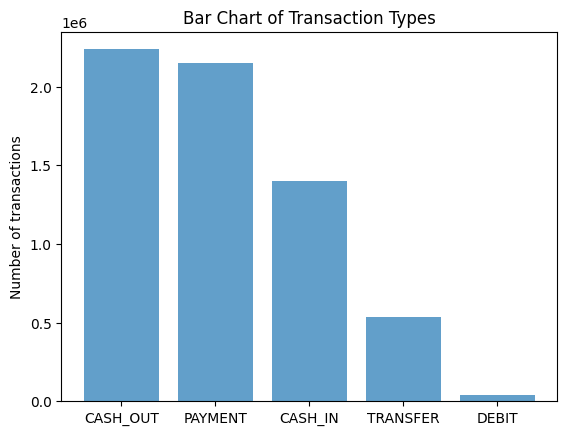

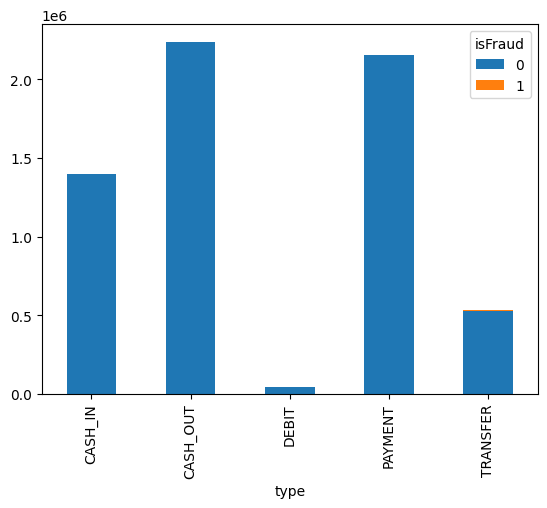

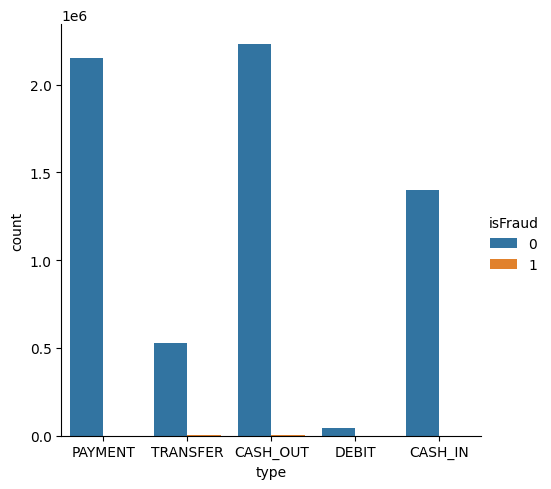

In [4]:
type_count = data['type'].value_counts()
plt.bar(type_count.index, type_count, alpha = 0.7)
plt.title('Bar Chart of Transaction Types')
plt.ylabel('Number of transactions')
plt.show()

fraud_count = data['isFraud'].value_counts()
pd.crosstab(data['type'],data['isFraud']).plot.bar(stacked=True)
sns.catplot(x='type',hue='isFraud',data=data,kind="count")

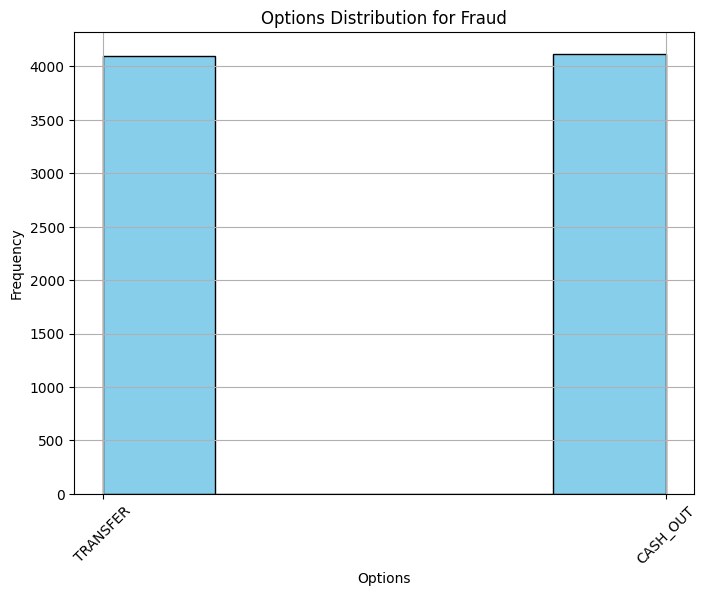

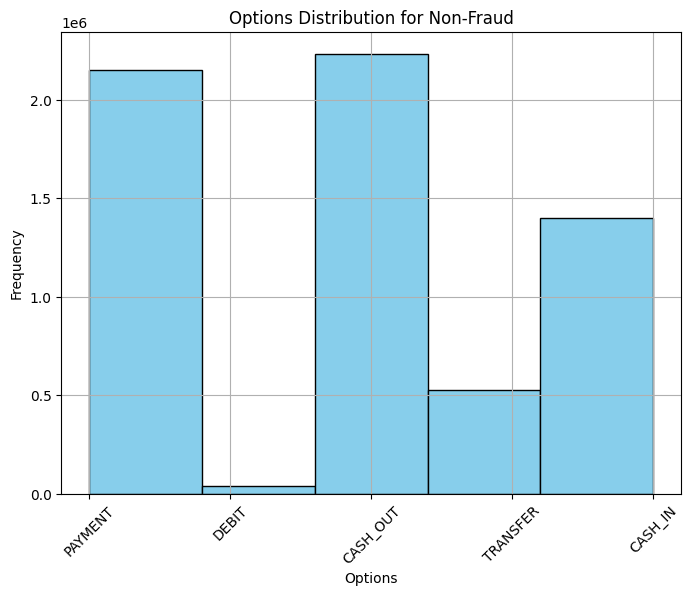

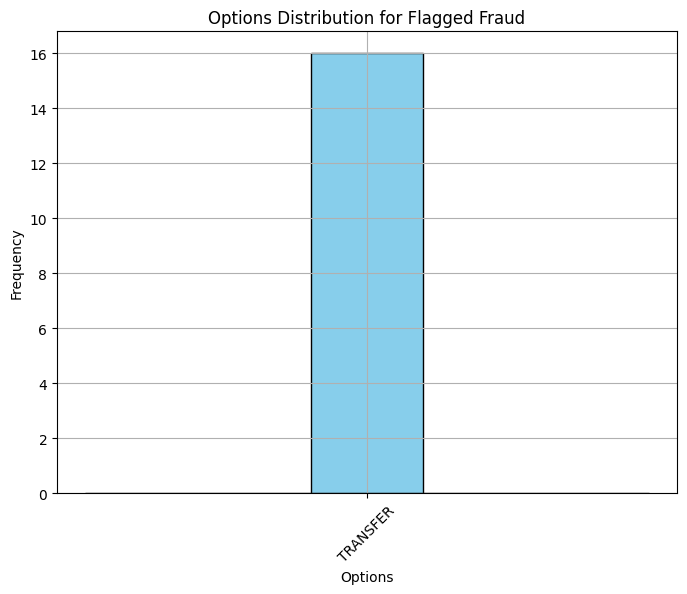

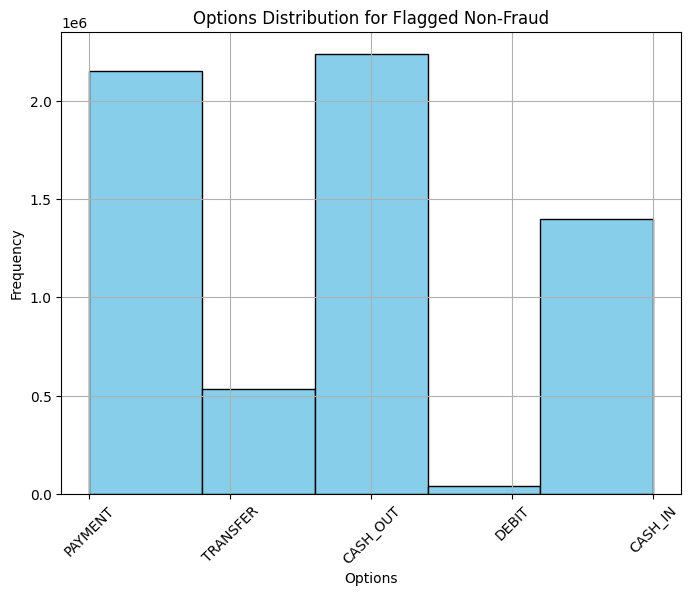

In [5]:
isFraud_1 = data[data['isFraud'] == 1]
isntFraud_1 = data[data['isFraud'] == 0]
isFlaggedFraud_1 = data[data['isFlaggedFraud'] == 1]
isntFlaggedFraud_1 = data[data['isFlaggedFraud'] == 0]

plt.figure(figsize=(8,6))
plt.hist(isFraud_1['type'], bins=5, color='skyblue', edgecolor='black')
plt.title('Options Distribution for Fraud')
plt.xlabel('Options')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

plt.figure(figsize=(8,6))
plt.hist(isntFraud_1['type'], bins=5, color='skyblue', edgecolor='black')
plt.title('Options Distribution for Non-Fraud')
plt.xlabel('Options')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

plt.figure(figsize=(8,6))
plt.hist(isFlaggedFraud_1['type'], bins=5, color='skyblue', edgecolor='black')
plt.title('Options Distribution for Flagged Fraud')
plt.xlabel('Options')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

plt.figure(figsize=(8,6))
plt.hist(isntFlaggedFraud_1['type'], bins=5, color='skyblue', edgecolor='black')
plt.title('Options Distribution for Flagged Non-Fraud')
plt.xlabel('Options')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



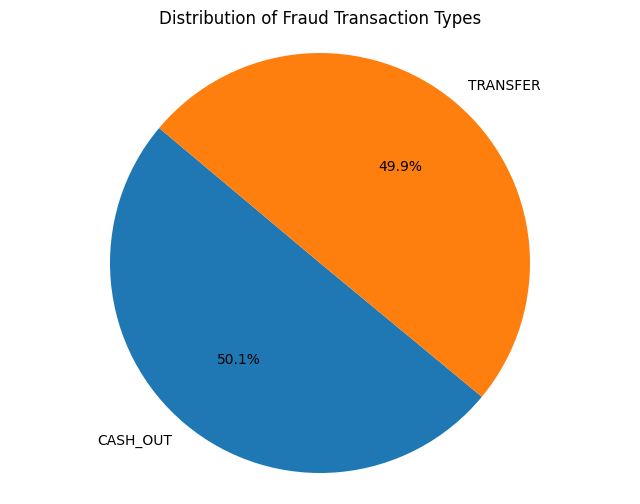

In [6]:
type_count_isFraud_1 = pd.Series(isFraud_1['type']).value_counts()
labels = type_count_isFraud_1.index.tolist()
sizes = type_count_isFraud_1.values.tolist()
plt.figure(figsize=(8,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Fraud Transaction Types')
plt.axis('equal')
plt.show()

In [7]:
data_2 = data.drop(['isFlaggedFraud','step'], axis=1)

isFraud_2 = data_2[data_2['isFraud'] == 1]
isntFraud_2 = data_2[data_2['isFraud']== 0]

duplicate_pairs = isFraud_2[isFraud_2.duplicated(subset=['amount'], keep=False)]

fraud_pairs = duplicate_pairs[
    ((duplicate_pairs['type'] == 'TRANSFER') & (duplicate_pairs['type'].shift(-1) == 'CASH_OUT')) |
    ((duplicate_pairs['type'] == 'CASH_OUT') & (duplicate_pairs['type'].shift(-1) == 'TRANSFER'))
]

mean_fraud_transaction = isFraud_2['amount'].mean()
mean_nonfraud_transaction = isntFraud_2['amount'].mean()
print(mean_fraud_transaction)
print(mean_nonfraud_transaction)

#Encoding
# Initialize OneHotEncoder
encoder = OneHotEncoder()

# Fit and transform the 'type' column
encoded_type = encoder.fit_transform(data_2[['type']])

1467967.299140387
178197.04172740763


In [8]:
# Create a DataFrame from the encoded data
#df_encoded = pd.DataFrame(encoded_type, columns=encoder.get_feature_names_out(['type']))



In [9]:
# Concatenate the encoded DataFrame with the original DataFrame
#df_final = pd.concat([data_2.drop('type', axis=1), df_encoded], axis=1)

In [10]:
#Neural Network 
#from keras.models import Sequential
#from keras.layers import Dense

#model = Sequential()

In [11]:
#model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu', input_dim = 5))
#model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu'))
#model.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))

         step      type      amount     nameOrig  oldbalanceOrg  \
3737323   278   CASH_IN   330218.42   C632336343       20866.00   
264914     15   PAYMENT    11647.08  C1264712553       30370.00   
85647      10   CASH_IN   152264.21  C1746846248      106589.00   
5899326   403  TRANSFER  1551760.63   C333676753           0.00   
2544263   206   CASH_IN    78172.30   C813403091     2921331.58   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
3737323       351084.42   C834976624       452419.57       122201.15        0   
264914         18722.92   M215391829            0.00            0.00        0   
85647         258853.21  C1607284477       201303.01        49038.80        0   
5899326            0.00  C1564353608      3198359.45      4750120.08        0   
2544263      2999503.88  C1091768874       415821.90       337649.60        0   

         isFlaggedFraud  
3737323               0  
264914                0  
85647                 0  
589932

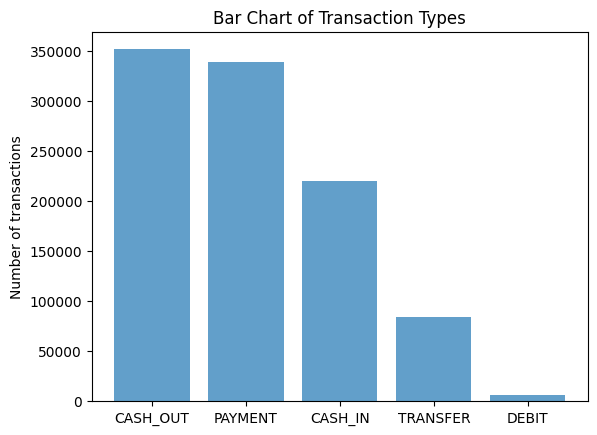

1371752.8674249605
178989.90421935168


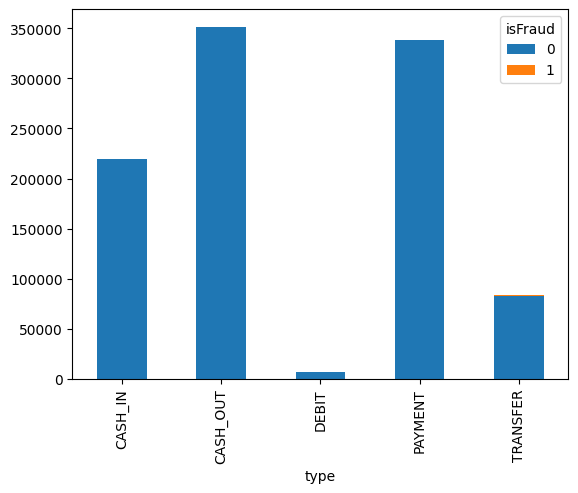

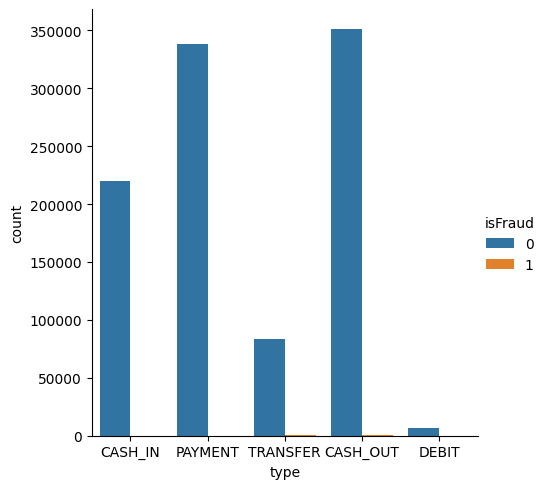

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score


# Load the dataset (assuming it's named 'fraud_detection.csv')
data = pd.read_csv('fraud_detection.csv')

# Sample a subset of your DataFrame
sample_size = 1000000  # Adjust the sample size as needed
data_sample = data.sample(n=sample_size, random_state=42)  # Randomly sample 'sample_size' rows

print(data_sample.head())
print(data_sample['type'].nunique())
print(data_sample['step'].nunique())

# Data Exploration and Visualization
type_count = data_sample['type'].value_counts()
plt.bar(type_count.index, type_count, alpha=0.7)
plt.title('Bar Chart of Transaction Types')
plt.ylabel('Number of transactions')
plt.show()

fraud_count = data_sample['isFraud'].value_counts()
pd.crosstab(data_sample['type'], data_sample['isFraud']).plot.bar(stacked=True)
sns.catplot(x='type', hue='isFraud', data=data_sample, kind="count")

# Feature Engineering
data_2 = data_sample.drop(['isFlaggedFraud', 'step'], axis=1)

isFraud_2 = data_2[data_2['isFraud'] == 1]
isntFraud_2 = data_2[data_2['isFraud'] == 0]

# Filter out duplicate pairs with 'TRANSFER' followed by 'CASH_OUT' or vice versa
duplicate_pairs = isFraud_2[isFraud_2.duplicated(subset=['amount'], keep=False)]

fraud_pairs = duplicate_pairs[
    ((duplicate_pairs['type'] == 'TRANSFER') & (duplicate_pairs['type'].shift(-1) == 'CASH_OUT')) |
    ((duplicate_pairs['type'] == 'CASH_OUT') & (duplicate_pairs['type'].shift(-1) == 'TRANSFER'))
]

mean_fraud_transaction = isFraud_2['amount'].mean()
mean_nonfraud_transaction = isntFraud_2['amount'].mean()
print(mean_fraud_transaction)
print(mean_nonfraud_transaction)

# Encoding
# Initialize OneHotEncoder
encoder = OneHotEncoder()

# Reset index of data_2
data_2.reset_index(drop=True, inplace=True)

# Fit and transform the 'type' column
encoded_type = encoder.fit_transform(data_2[['type']])

# Create DataFrame with encoded data
df_encoded = pd.DataFrame(encoded_type.toarray(), columns=encoder.get_feature_names_out(['type']))

# Concatenate the encoded DataFrame with the original DataFrame
df_final = pd.concat([data_2.drop('type', axis=1), df_encoded], axis=1)

# Drop the columns "nameOrig" and "nameDest" from the DataFrame
df_final = df_final.drop(['nameOrig', 'nameDest'], axis=1)

In [13]:
print(df_final.head(20))

        amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  newbalanceDest  \
0    330218.42       20866.00       351084.42       452419.57       122201.15   
1     11647.08       30370.00        18722.92            0.00            0.00   
2    152264.21      106589.00       258853.21       201303.01        49038.80   
3   1551760.63           0.00            0.00      3198359.45      4750120.08   
4     78172.30     2921331.58      2999503.88       415821.90       337649.60   
5       915.13           0.00            0.00            0.00            0.00   
6     20603.87           0.00            0.00       558068.66       578672.53   
7     58605.72           0.00            0.00       585494.94       644100.66   
8      4865.11           0.00            0.00            0.00            0.00   
9    118131.63           0.00            0.00      8131691.35      8476246.86   
10   141100.88       80506.00            0.00        89384.09       230484.96   
11   384177.48       40348.0

In [14]:
print(fraud_pairs.head(30))

             type       amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
6296011  CASH_OUT  10000000.00      C546529    10000000.00            0.00   
6296641  TRANSFER   2772043.90    C48717380     2772043.90            0.00   
4782094  CASH_OUT    964388.10   C186550452      964388.10            0.00   
3811337  TRANSFER   1030417.74  C1060613319     1030417.74            0.00   
4912416  CASH_OUT     14279.89   C661074170       14279.89            0.00   
6362476  TRANSFER    219934.26  C1104155037      219934.26            0.00   
1511385  CASH_OUT    113614.57   C605744517      113614.57            0.00   
318373   TRANSFER   2198224.71   C752563135     2198224.71            0.00   
1063707  CASH_OUT    202263.03   C265913219      202263.03            0.00   
2801145  TRANSFER   1150717.15   C578750781     1150717.15            0.00   
1968865  CASH_OUT    763913.96   C743019474      763913.96            0.00   
1331831  TRANSFER   3116833.75   C965340171     3116833.75      

In [15]:
# Filter data_2 to include only the rows present in fraud_pairs
fraud_pairs_data = data_2.loc[data_2.index.isin(fraud_pairs.index)].copy()

# Set 'isFraud' column to 1 for all rows in fraud_pairs_data
fraud_pairs_data.loc[:, 'isFraud'] = 1

# Check if fraud_pairs_data contains at least one row
if len(fraud_pairs_data) > 0:
    # Reset index of fraud_pairs_data
    fraud_pairs_data.reset_index(drop=True, inplace=True)

    # Initialize OneHotEncoder
    encoder = OneHotEncoder()

    # Fit and transform the 'type' column
    encoded_type_fraud_pairs = encoder.fit_transform(fraud_pairs_data[['type']])

    # Create DataFrame with encoded data
    df_encoded_fraud_pairs = pd.DataFrame(encoded_type_fraud_pairs.toarray(), columns=encoder.get_feature_names_out(['type']))

    # Concatenate the encoded DataFrame with the original DataFrame
    df_final_fraud_pairs = pd.concat([fraud_pairs_data.drop('type', axis=1), df_encoded_fraud_pairs], axis=1)

    # Print the DataFrame containing only fraud_pairs and their encoded 'type' column
    print(df_final_fraud_pairs)
else:
    print("No fraud pairs found in the dataset.")

      amount     nameOrig  oldbalanceOrg  newbalanceOrig     nameDest  \
0   20819.51   C674595914        7706.00            0.00   M452881409   
1   41330.78   C315204123           0.00            0.00   C688516052   
2  321671.68   C796412458           0.00       321671.68  C1961746653   
3  153282.06   C231998401     5207107.91      5360389.97     C1271998   
4   31645.57  C1596554077           0.00            0.00   C770091069   
5  155165.91  C1341615369           0.00            0.00   C172063096   
6   51628.76   C156797011           0.00            0.00  C1577414088   
7  177510.54    C52817969           0.00            0.00  C1582765215   

   oldbalanceDest  newbalanceDest  isFraud  type_CASH_IN  type_CASH_OUT  \
0            0.00            0.00        1           0.0            0.0   
1       147097.83       188428.61        1           0.0            1.0   
2       519253.47       197581.79        1           1.0            0.0   
3     14921461.73     14768179.67        1

In [16]:
print(df_final)

            amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0        330218.42       20866.00       351084.42       452419.57   
1         11647.08       30370.00        18722.92            0.00   
2        152264.21      106589.00       258853.21       201303.01   
3       1551760.63           0.00            0.00      3198359.45   
4         78172.30     2921331.58      2999503.88       415821.90   
...            ...            ...             ...             ...   
999995     8418.66           0.00            0.00            0.00   
999996   123558.56           0.00            0.00       270455.37   
999997    37283.53      420290.00       383006.47            0.00   
999998   246299.15       90788.00            0.00            0.00   
999999     3700.20       21390.00        17689.80            0.00   

        newbalanceDest  isFraud  type_CASH_IN  type_CASH_OUT  type_DEBIT  \
0            122201.15        0           1.0            0.0         0.0   
1                 0

In [17]:
from sklearn.ensemble import RandomForestClassifier

# Split the data into features (X) and target variable (y)
X = df_final.drop('isFraud', axis=1)  # Features
y = df_final['isFraud']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the regression model (e.g., Logistic Regression)
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model (example: calculate accuracy)
accuracy = accuracy_score(y_test, y_pred)

# Print evaluation result
print("Accuracy:", accuracy)

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9993
Confusion Matrix:
[[199754     13]
 [   127    106]]
Precision: 0.8907563025210085
Recall: 0.45493562231759654
F1-score: 0.6022727272727273


In [18]:
# Initialize the Random Forest Classifier
model_forest = RandomForestClassifier()

# Train the model
model_forest.fit(X_train, y_train)

# Make predictions on the test set
y_pred_forest = model_forest.predict(X_test)

# Evaluate the model
accuracy_forest = accuracy_score(y_test, y_pred_forest)
precision_forest = precision_score(y_test, y_pred_forest)
recall_forest = recall_score(y_test, y_pred_forest)
f1_forest = f1_score(y_test, y_pred_forest)

# Print evaluation metrics
print("Accuracy:", accuracy_forest)
print("Precision:", precision_forest)
print("Recall:", recall_forest)
print("F1-score:", f1_forest)

# Calculate confusion matrix
conf_matrix_forest = confusion_matrix(y_test, y_pred_forest)
print("Confusion Matrix:")
print(conf_matrix_forest)


Accuracy: 0.99968
Precision: 0.9720670391061452
Recall: 0.7467811158798283
F1-score: 0.8446601941747572
Confusion Matrix:
[[199762      5]
 [    59    174]]


In [19]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid with reduced options
param_grid = {
    'n_estimators': [50, 100],  # Reduced number of trees for early stopping
    'max_depth': [3, 6],  # Adjust the maximum depth of trees
    'learning_rate': [0.1, 0.3],  # Adjust the learning rate
    'min_child_weight': [1, 3]  # Adjust the minimum sum of instance weight
}

# Initialize the XGBoost Classifier
xgb = XGBClassifier(random_state=42, early_stopping_rounds=10)

# Initialize Grid Search with cross-validation
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Perform Grid Search
grid_search.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_xgb = grid_search.best_estimator_

# Evaluate the best model
y_pred = best_xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the hyperparameter grid with reduced options
param_grid = {
    'C': [0.1, 1],  # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernel type
    'gamma': ['scale', 'auto']  # Kernel coefficient
}

# Initialize the Support Vector Classifier
svc = SVC(random_state=42)

# Initialize Randomized Search with cross-validation
random_search = RandomizedSearchCV(estimator=svc, param_distributions=param_grid, n_iter=3,
                                   cv=4, scoring='accuracy', random_state=42)

# Perform Randomized Search
random_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

# Get the best model
best_svc = random_search.best_estimator_

# Evaluate the best model
y_pred = best_svc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)